<center>
    <h1>Verbal Explanation of Spatial Temporal GNNs for Traffic Forecasting</h1>
    <h2>Data Analysis on the PeMS-Bay dataset</h2>
</center>

---

In this notebook the *PeMS-Bay* dataset is analysed. The ratio of missing values per node and in total is explored along with the distribution of speed on the first day and the clusters visualization. Furthermore, the three nodes with highest speed variance over the period are selected and their collected speed values are aggregated on a hour basis over the first week and plotted.

The ***PeMS-Bay*** traffic dataset is collected by *California Transportation Agencies (CalTrans) Performance Measurement System (PeMS)*. $325$ sensors are selected in the Bay Area and data is collected ranging from Jan $1^{st}$ $2017$ to May $31^{th}$ $2017$ for the experiment.

The traffic speed readings are aggregated in $5$ minutes windows.

The total number of observed traffic data points is $16,937,179$.

For more detailed informations about the used functions, look into the corresponding docstrings inside the python files, inside the `src` folder.

The dataset used in the work is the one presented in the experiment providing the original benchmark, which code is available at the following link: https://github.com/liyaguang/DCRNN.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
import os

# Set the main path in the root folder of the project.
sys.path.append(os.path.join('..'))

In [3]:
# Settings for autoreloading

%load_ext autoreload
%autoreload 2

In [4]:
# Set the base data directory.
BASE_DATA_DIR = os.path.join('..', 'data', 'pems-bay', 'raw')

# Set the base configuration directory.
BASE_CONFIG_DIR = os.path.join('..', 'config', 'kepler', 'pems-bay')

# 1 Dataset Download

Firstly, the *PeMS-Bay* dataset is downloaded along with the dataset containing the latitude and lonngitude information of each sensor.

In [5]:
from src.data.data_extraction import get_node_values_dataframe

# Get the dataframe containing the node values at different timestamps.
node_values_df = get_node_values_dataframe(
    os.path.join(BASE_DATA_DIR, 'pems-bay.h5'), turn_in_kmph=True)

In [6]:
node_values_df.head()

,400001,400017,400030,400040,400045,400052,400057,400059,400065,400069,...,409525,409526,409528,409529,413026,413845,413877,413878,414284,414694
2017-01-01 00:00:00,114.907162,109.113523,113.458752,108.469786,110.722867,107.182310,107.504179,109.435392,107.504179,111.044736,...,110.722867,109.274458,110.722867,109.435392,111.366605,110.883802,113.297818,110.722867,114.424358,109.435392
2017-01-01 00:05:00,115.229030,108.630720,113.619686,108.630720,110.561933,107.182310,107.504179,109.113523,107.021376,109.757261,...,110.079130,108.308851,110.079130,108.791654,113.297818,110.722867,112.815014,110.079130,113.941555,108.469786
2017-01-01 00:10:00,115.229030,108.791654,112.975949,108.469786,110.561933,106.377638,107.504179,109.113523,106.538573,109.113523,...,110.079130,108.469786,110.079130,108.630720,112.975949,109.918195,112.332211,110.079130,113.458752,109.274458
2017-01-01 00:15:00,114.424358,108.630720,113.136883,109.435392,110.240064,107.343245,107.182310,108.952589,106.055770,109.113523,...,110.240064,108.630720,110.240064,108.630720,113.297818,110.561933,112.975949,110.079130,113.941555,108.791654
2017-01-01 00:20:00,115.389965,109.113523,112.975949,109.596326,110.079130,107.665114,106.377638,108.952589,106.377638,109.113523,...,110.240064,108.952589,110.240064,108.469786,112.010342,111.205670,112.654080,110.079130,114.263424,109.274458


In [7]:
print('Shape of the node value dataframe:', node_values_df.shape)

Shape of the node value dataframe: (52116, 325)


In [8]:
from src.data.data_extraction import get_locations_dataframe

# Get the dataframe containing the latitude and longitude of each sensor.
locations_df = get_locations_dataframe(
    os.path.join(BASE_DATA_DIR, 'graph_sensor_locations_pems_bay.csv'),
    has_header=False)

In [9]:
locations_df.head()

,sensor_id,latitude,longitude
index,,,
0,400001,37.364085,-121.901149
1,400017,37.253303,-121.945440
2,400030,37.359087,-121.906538
3,400040,37.294949,-121.873109
4,400045,37.363402,-121.902233


In [10]:
print('Shape of the locations dataframe:', locations_df.shape)

Shape of the locations dataframe: (325, 3)


# 2 Spatial Analysis

The spatial network representing the city is observed. The network mainly covers the area of central *San Jose* and it also includes the zones of *Milpitas*, *Santa Clara*, *Cupertino*, *Sunnyvale* and *Mountain View*.

In [11]:
from src.data.data_analysis import show_kepler_map

print('PeMS-Bay spatial map:')
show_kepler_map(locations_df,
                os.path.join(BASE_CONFIG_DIR, 'spatial-map.json'))

PeMS-Bay spatial map:


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'i6tmzgh', 'type': …

# 3 Missing Values

Next, the missing value ratio for of each node is observed.

In [12]:
from src.data.data_analysis import get_missing_values_by_location_dataframe

missing_values_by_location = get_missing_values_by_location_dataframe(
    node_values_df, locations_df)

The map visualizes the total amount of missing values per node. We can observe that lower ratios of missing values are observed in the northern-most and southern-most highways.

Nonetheless, as seen in the legend, the ratio of missing values are extremely low for every node.

In [13]:
from src.data.data_analysis import show_kepler_map

print('PeMS-Bay percentage of total missing values per node:')
show_kepler_map(missing_values_by_location,
                os.path.join(BASE_CONFIG_DIR, 'missing-values-map.json'))

PeMS-Bay percentage of total missing values per node:


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'm5qtvza', 'type': …

The total percentage of missing information is quite low, indicating that most data in the dataset is available.

In [14]:
print('Total percentage of missing values:',
      f'{(node_values_df == 0.).to_numpy().mean() * 100:.2g} %')

Total percentage of missing values: 0.0031 %


# 3 Speed Analysis
In this section it is observed how the speed of the nodes evolves over time.

Firstly, the speed distribution among nodes in the peak period of a particular day is observed.
Next, the distribution of the speed during a whole week is illustrated for selected nodes.
Finally, the average speed of all nodes in selected aggregated periods is plotted.

## 3.1 Speed distribution on peak hours of a day
The speed variation analysis is performed as an example for the nodes in the peak period of the first Monday of the whole considered period. In particular, the time between $07$:$00$ am and $08$:$00$ pm is considered.

In [15]:
from src.data.data_analysis import get_day_dataframe

first_monday_df = get_day_dataframe(node_values_df, 'Monday')

In [16]:
# import numpy as np
from src.data.data_analysis import get_node_values_with_location_dataframe

location_df_with_speed = get_node_values_with_location_dataframe(
    first_monday_df, locations_df,
    metric_name='Speed', turn_datetimes_to_timestamp=False)

# Remove the rows with a speed of 0.
location_df_with_speed = location_df_with_speed[
    location_df_with_speed.Speed != 0]

The map illustrates the variation of speed during the considered time for the first Monday of the pariod.

We can observe that the lowest speeds are visible qualitatively speaking before $09$:$00$ am and after $01$:$00$ pm. In the last hour generally high speeds are observed in each node.

The biggest traffic jams are observed in general in the highway connecting *Mountain View* and *Cupertino* and the one connecting *Mountain View* to *San Jose*.

Interestingly, high values of speed are present in the southern-most highway and in the central *San Jose* area for most of the considered period.

In [17]:
from src.data.data_analysis import show_kepler_map

print('PeMS-Bay variation of node speed on the first Monday:')
show_kepler_map(location_df_with_speed,
                os.path.join(BASE_CONFIG_DIR, 'speed-on-first-monday.json'))

PeMS-Bay variation of node speed on the first Monday:


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [{'dataId': ['data'], 'id': 'nmfcr3inl', …

The following map clusters together spatially close nodes and illustrates the average speed in the considered clusters over time.

The results confirm once again that the highest amount of traffic clusters are seen in the areas described before.

In [18]:
from src.data.data_analysis import show_kepler_map

print('PeMS-Bay speed clusters on the first Monday:')
show_kepler_map(location_df_with_speed,
                os.path.join(BASE_CONFIG_DIR, 'clusters-on-first-monday.json'))

PeMS-Bay speed clusters on the first Monday:


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [{'dataId': ['data'], 'id': 'nmfcr3inl', …

## 3.2 Speed Distribution per Day

In this section the nodes with the largest variation of speed along the period are selected as they are considered the ones that could contain the most interesting patterns.

Their speed averaged by hour is plotted for each day of the week. In particular, the first week of the period is considered as a sample.

Finally, the average speed distribution of all nodes by hour of the day and day of the week is illustrated.

In [19]:
from src.data.data_analysis import (
    get_node_values_df_of_nodes_with_largest_speed_variation)

node_values_reduced = get_node_values_df_of_nodes_with_largest_speed_variation(
    node_values_df)

In [20]:
node_values_reduced.head()

,400586,400895,400069
2017-01-01 00:00:00,111.044736,116.999309,111.044736
2017-01-01 00:05:00,111.366605,117.321178,109.757261
2017-01-01 00:10:00,110.883802,116.355571,109.113523
2017-01-01 00:15:00,110.079130,115.711834,109.113523
2017-01-01 00:20:00,109.757261,115.711834,109.113523


Generally speaking, the resulting plots illustrate that on each weekday lowest speed values are reached between the working hours $03$:$00$ pm - $07$:$00$ pm.

On Saturday speed values present a downward trend as high speed are observed at morning hours, while low speeds are reached at night. Interesting peaks of speed are observed at $09$:$00$ am, $03$:$00$ pm and $08$:$00$ pm.

On Sunday, the speed are generally high, especially for node `400895`. Throughs are observed between $12:00$ am and $05$:$00$ pm.

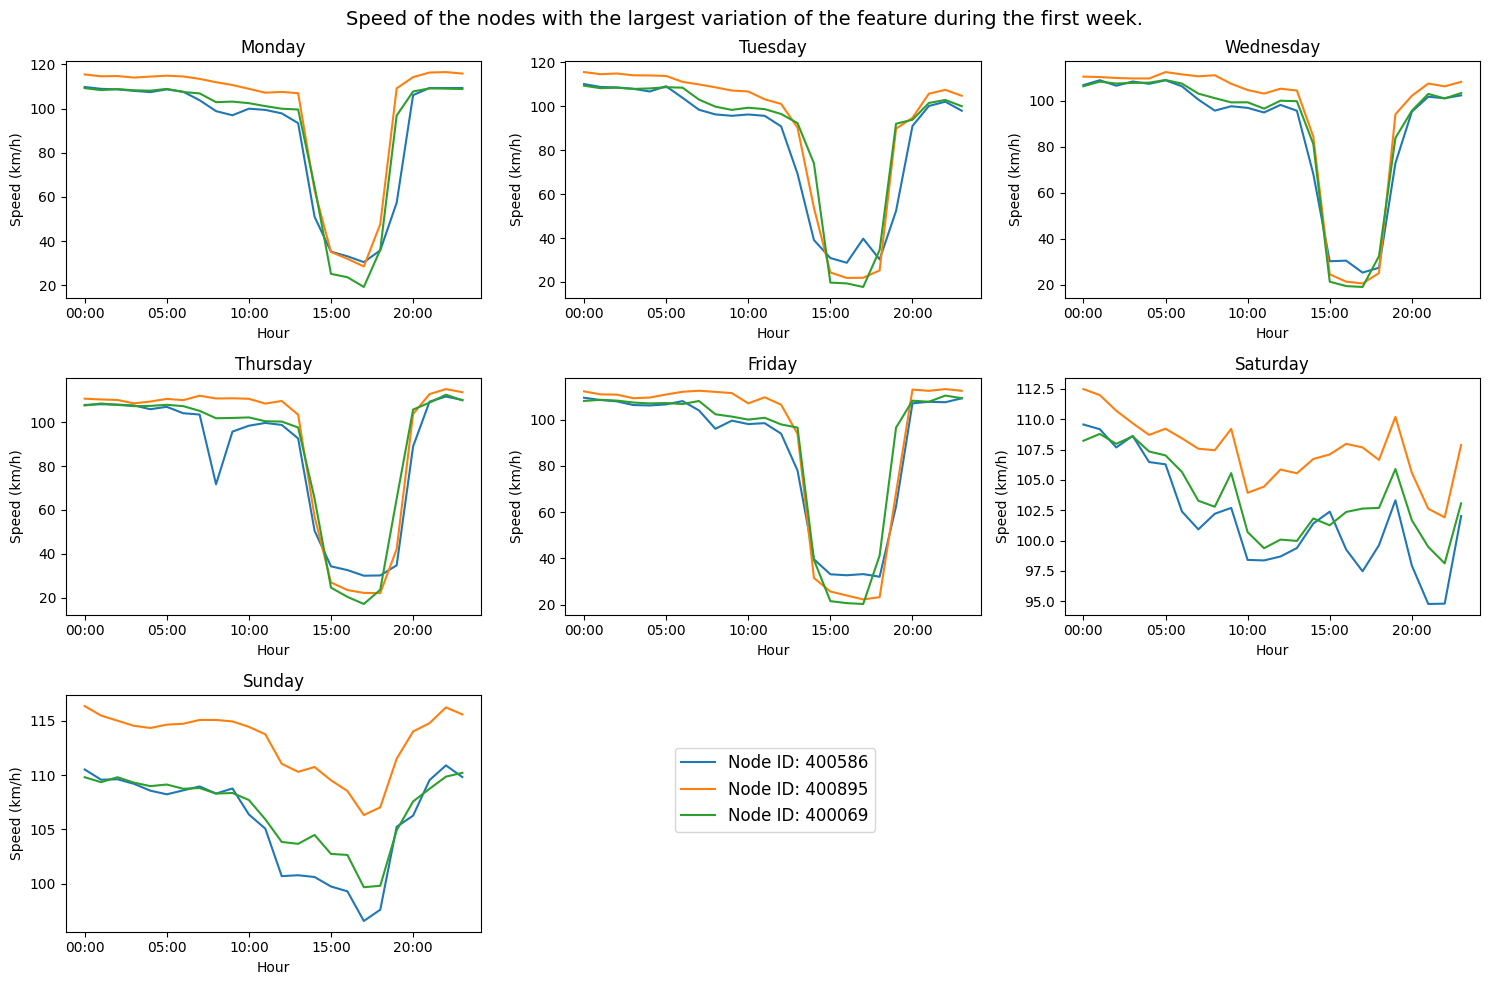

In [21]:
from src.data.data_analysis import plot_daily_speed_variation

plot_daily_speed_variation(node_values_reduced)

Regarding the average speed per hour, The highest velocities are reached at night, while troughs are seen during roush hours. Namely $08$:$00$ am and $05$:$00$ pm.

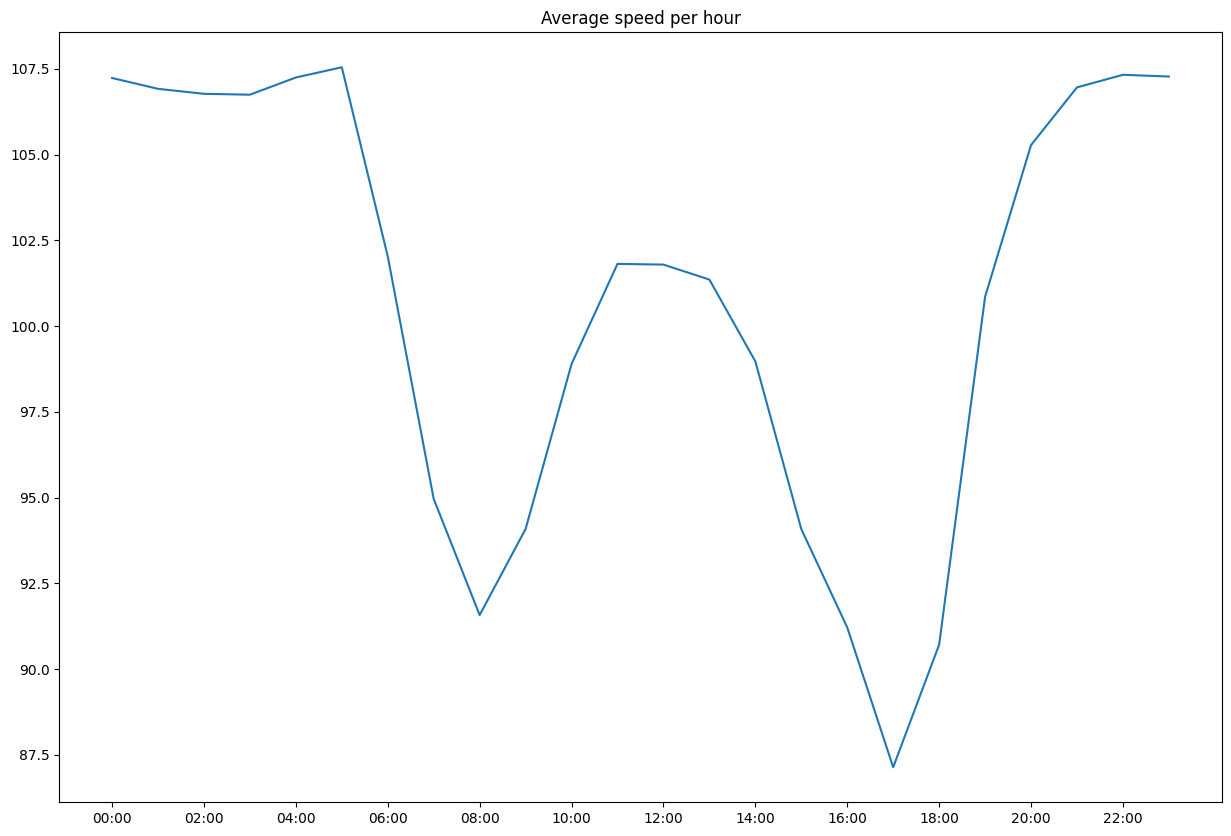

In [22]:
from src.data.data_analysis import plot_average_speed_by_hour

plot_average_speed_by_hour(node_values_df)

As expected, lowest average speeds are observed in weekdays, with values generally below $100$ km/h. On the weekends the average speed increases to over $105$ km/h. This behavior is expected as during weekdays the traffic flow should be higher. Notwithstanding, the difference of speed among weekdays and weekend days is not that high.

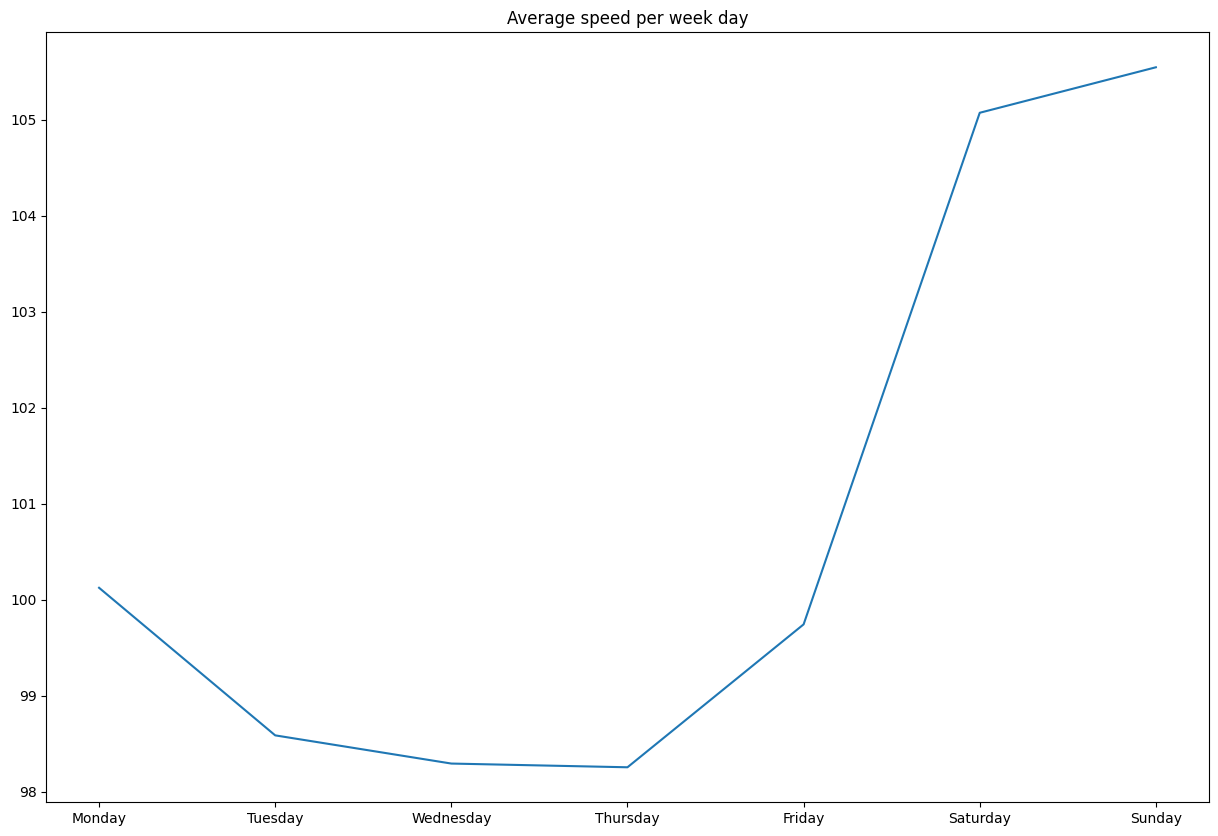

In [23]:
from src.data.data_analysis import plot_average_speed_by_day

plot_average_speed_by_day(node_values_df)

## 3.3 Featured Distribution

In this section the feature distribution is illustrated in the whole dataset.

In [24]:
from src.data.data_processing import get_node_values_numpy_matrix

node_values_np, _ = get_node_values_numpy_matrix(
    node_values_df,
    time_aggregations=['time_of_day', 'day_of_week'])

In [25]:
from src.data.data_analysis import get_node_values_statistics_dataframe

statistics_df = get_node_values_statistics_dataframe(
    node_values_np, feature_names=['speed', 'time of day', 'day of week'],
    has_day_of_the_week=True)

It can be seen that the `time of the day` and the `day of the week` follow a uniform distribution, meaning that each element of them is equally represented in the data.

Speed follows a left skewed normal distribution, meaning that in the data the node generally present more instances of congestions than free flow. It is notable that value $0$ has a low frequency, this is in line with the fact that just a few missing values are present in the data.

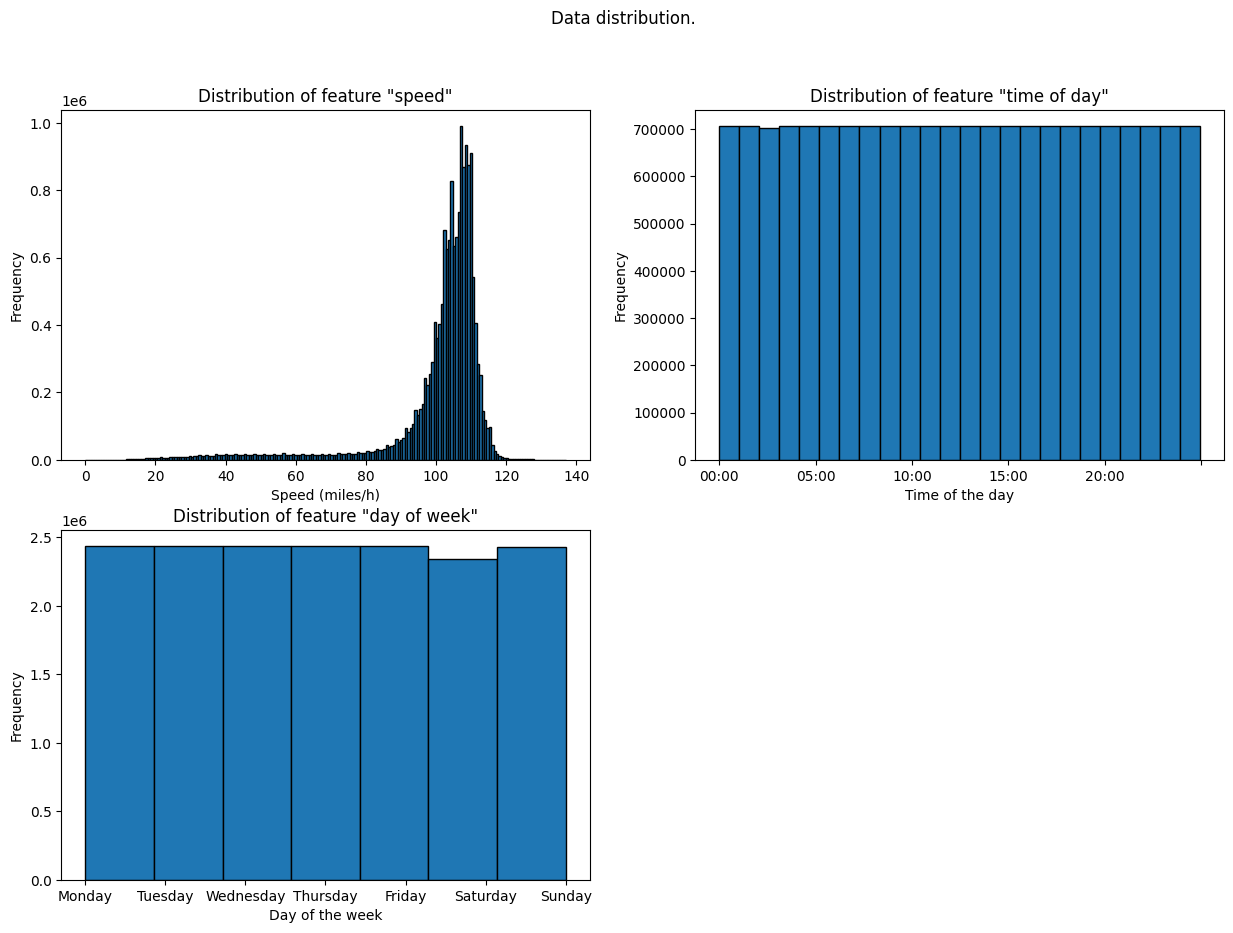

In [26]:
from src.data.data_analysis import plot_data_distribution

plot_data_distribution(
    statistics_df, bins=[200, 24, 7], 
    x_labels=['Speed (miles/h)', 'Time of the day',
              'Day of the week'],
    title='Data distribution.')